# REAL ESTATE HOUSE PREDECTION



In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
import seaborn as sns
import pickle
warnings.filterwarnings('ignore')

# DATASET DESCRIPTION

This data frame contains the following columns:

- crim: per capita crime rate by town.

- zn: proportion of residential land zoned for lots over 25,000 sq.ft.

- indus:proportion of non-retail business acres per town.

- chas "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox :nitrogen oxides concentration (parts per 10 million).

- rm :average number of rooms per dwelling.

- age :proportion of owner-occupied units built prior to 1940.

- dis: weighted mean of distances to five Boston employment centres.

- ptratio: pupil-teacher ratio by town.

- lstat:lower status of the population (percent).

- rad: index of accessibility to radial highways.

- medv:Median value of owner-occupied homes in \$1000s.

- b:where Bk is the proportion of blacks by town.





In [7]:
data = pd.read_csv('house.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The dataset for this project originates from the [UCI Machine Learning Repository]. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation

<AxesSubplot:>

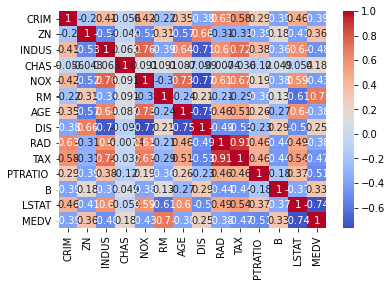

In [8]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

- As we can see from the above correlation matrix, **MED** is highly correlated with **RM, LSTAT,PTRATIO**.
- So our **features are-** RM, LSTAT, PTRATIO  and our **target variable is** MEDV

In [9]:
data=pd.read_csv('housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [10]:
prices=data['MEDV']

In [11]:
features=data.drop('MEDV',axis=1)
features

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


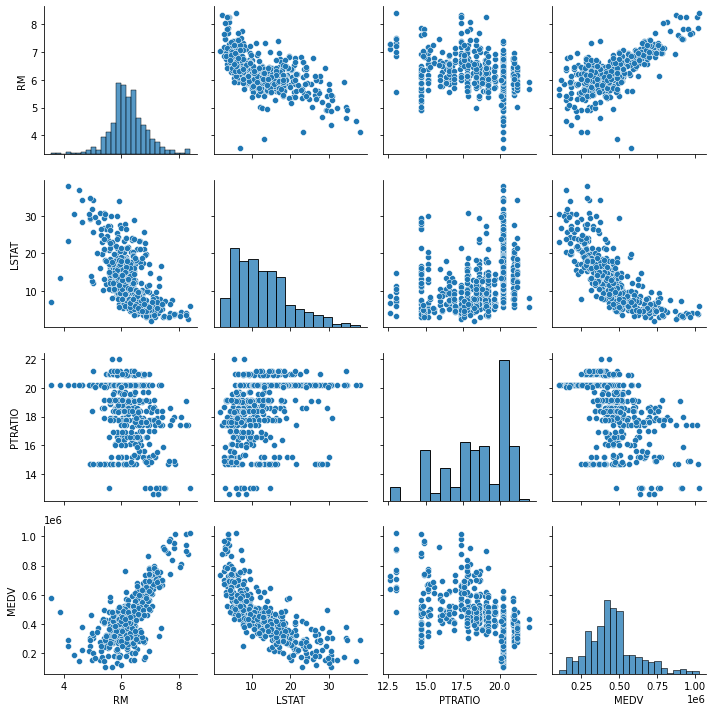

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(data, size=2.5)
plt.tight_layout()

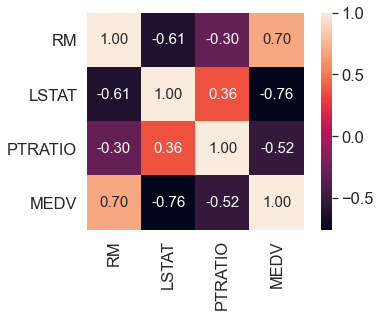

In [13]:
cols=['RM','LSTAT','PTRATIO','MEDV']
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)

## Developing a Model
In this section we wiil apply different algorithim to train our dataset and give us predection
We have applied many Regression Techniques like:
- Linear Regression
- Lasso Regression
- Ridge Regression
- Ploynomial Regression
- MLP resgression
- KNN regression
- Random Forest regression
- Decession Tree regression

In [14]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

In [16]:
def model(pipeline, parameters, X_train, y_train, X, y):
    grid_obj = GridSearchCV(estimator=pipeline,
                            param_grid=parameters,
                            cv=3,
                            scoring='r2',
                            verbose=2,
                            n_jobs=1,
                            refit=True)
    grid_obj.fit(X_train, y_train)

    '''Results'''

    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)
    
    print("##### Results")
    print(results_sorted)

    print("best_index", grid_obj.best_index_)
    print("best_score", grid_obj.best_score_)
    print("best_params", grid_obj.best_params_)

    '''Cross Validation'''

    estimator = grid_obj.best_estimator_
    '''
    if estimator.named_steps['scl'] == True:
        X = (X - X.mean()) / (X.std())
        y = (y - y.mean()) / (y.std())
    '''
    shuffle = KFold(n_splits=5,shuffle=True,random_state=0)
    cv_scores = cross_val_score(estimator,
                                X,
                                y.values.ravel(),
                                cv=shuffle,
                                scoring='r2')
    print("##### CV Results")
    print("mean_score", cv_scores.mean())

    '''Show model coefficients or feature importances'''
    try:
        print("Model coefficients: ", list(zip(list(X), estimator.named_steps['clf'].coef_)))
    except:
        print("Model does not support model coefficients")
    try:
        print("Feature importances: ", list(zip(list(X), estimator.named_steps['clf'].feature_importances_)))
    except:
        print("Model does not support feature importances")

    '''Predict along CV and plot y vs. y_predicted in scatter'''

    y_pred = cross_val_predict(estimator, X, y, cv=shuffle)

    plt.scatter(y, y_pred)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    plt.annotate(' R-squared CV = {}'.format(round(float(cv_scores.mean()), 3)), size=9,
             xy=(xmin,ymax), xytext=(10, -15), textcoords='offset points')
    plt.annotate(grid_obj.best_params_, size=9,
                 xy=(xmin, ymax), xytext=(10, -35), textcoords='offset points', wrap=True)
    plt.title('Predicted prices (EUR) vs. True prices (EUR)')
    plt.show()

### LINEAR REGRESSION

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       0.043774      0.024244         0.004788         0.00287     {}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.664374            0.70415           0.757688         0.708737   

   std_test_score  rank_test_score  
0        0.038233                1  
best_index 0
best_score 0.708737169337665
best_params {}
##### CV Results
mean_score 0.711345912008384
Model coefficients:  [('RM', 58790.17113748401), ('LSTAT', -75604.39691794886), ('PTRATIO', -42110.89258824107)]
Model does not support feature importances


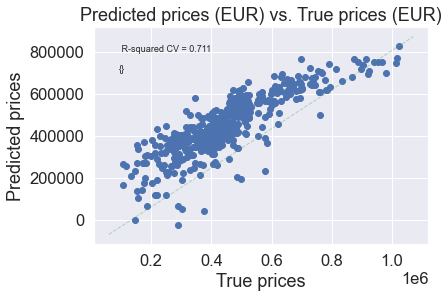

In [17]:
pipe_ols = Pipeline([('scl', StandardScaler()),
           ('clf', LinearRegression())])

param_ols = {}

model(pipe_ols, param_ols, X_train, y_train, features,prices)

### XGBRegressor

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time=   0.3s
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time=   0.0s
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time=   0.0s
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.216752      0.141471         0.007231        0.003017   

  param_clf__colsample_bytree param_clf__gamma param_clf__max_depth  \
0                           1             0.01                    5   

  param_clf__min_child_weight param_clf__subsample  \
0                           6                  0.7   

                                              params  split0_test_score  \
0  {'clf__colsample_bytree': 1, 'clf__gamma': 0.0...           0.7

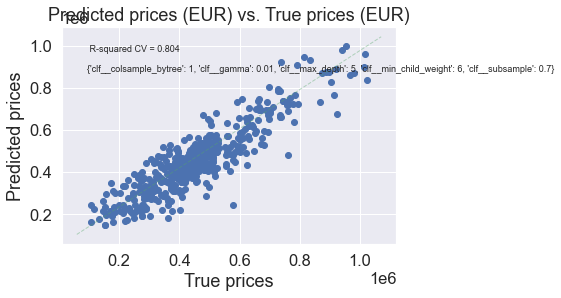

In [18]:
pipe_xgb = Pipeline([('clf', xgb.XGBRegressor())])

param_xgb = {'clf__max_depth':[5],
             'clf__min_child_weight':[6],
             'clf__gamma':[0.01],
             'clf__subsample':[0.7],
             'clf__colsample_bytree':[1]}
model(pipe_xgb, param_xgb, X_train, y_train,features,prices)

### KNN REGRESSION

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .................................clf__n_neighbors=5; total time=   0.0s
[CV] END .................................clf__n_neighbors=5; total time=   0.0s
[CV] END .................................clf__n_neighbors=5; total time=   0.0s
[CV] END ................................clf__n_neighbors=10; total time=   0.0s
[CV] END ................................clf__n_neighbors=10; total time=   0.0s
[CV] END ................................clf__n_neighbors=10; total time=   0.0s
[CV] END ................................clf__n_neighbors=15; total time=   0.0s
[CV] END ................................clf__n_neighbors=15; total time=   0.0s
[CV] END ................................clf__n_neighbors=15; total time=   0.0s
[CV] END ................................clf__n_neighbors=25; total time=   0.0s
[CV] END ................................clf__n_neighbors=25; total time=   0.0s
[CV] END ................................clf__n_n

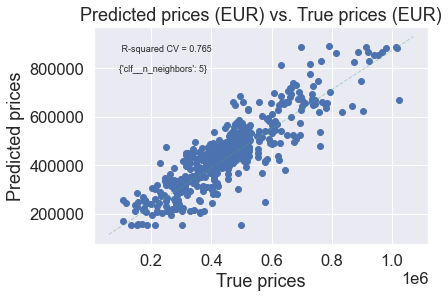

In [19]:
# Pipeline and Parameters - KNN

pipe_knn = Pipeline([('clf', KNeighborsRegressor())])

param_knn = {'clf__n_neighbors':[5, 10, 15, 25, 30]}

model(pipe_knn, param_knn, X_train, y_train,features,prices)

### LASSO REGRESSION

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END ......................................clf__alpha=10; total time=   0.0s
[CV] END ......................................clf__alpha=10; total time=   0.0s
[CV] END ......................................cl

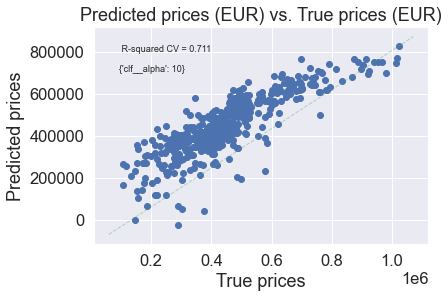

In [20]:
# Pipeline and Parameters - Lasso
pipe_lasso = Pipeline([('scl', StandardScaler()),
           ('clf', Lasso(max_iter=1500))])
param_lasso = {'clf__alpha': [0.01, 0.1, 1, 10]}
model(pipe_lasso, param_lasso, X_train, y_train,features,prices)


### RIDGE REGRESSION

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END ......................................clf__alpha=10; total time=   0.0s
[CV] END ......................................clf__alpha=10; total time=   0.0s
[CV] END ......................................cl

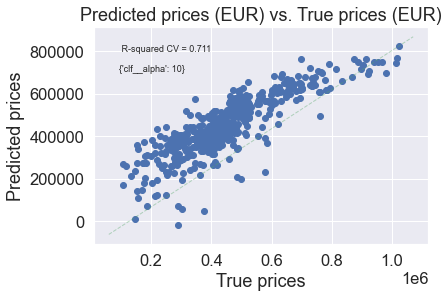

In [21]:
# Pipeline and Parameters - Ridge
pipe_ridge = Pipeline([('scl', StandardScaler()),
           ('clf', Ridge())])
param_ridge = {'clf__alpha': [0.01, 0.1, 1, 10]}
model(pipe_ridge, param_ridge, X_train, y_train,features,prices)

### Polynomial Regression

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...............................polynomial__degree=2; total time=   0.0s
[CV] END ...............................polynomial__degree=2; total time=   0.0s
[CV] END ...............................polynomial__degree=2; total time=   0.0s
[CV] END ...............................polynomial__degree=4; total time=   0.0s
[CV] END ...............................polynomial__degree=4; total time=   0.0s
[CV] END ...............................polynomial__degree=4; total time=   0.0s
[CV] END ...............................polynomial__degree=6; total time=   0.0s
[CV] END ...............................polynomial__degree=6; total time=   0.0s
[CV] END ...............................polynomial__degree=6; total time=   0.0s
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.016232      0.003919         0.004192        0.002111   
1       0.019726      0.002135         0.008971        0.006754 

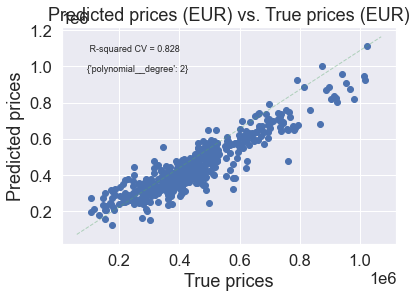

In [22]:
# Pipeline and Parameters - Polynomial Regression

pipe_poly = Pipeline([('scl', StandardScaler()),
                       ('polynomial', PolynomialFeatures()),
                       ('clf', LinearRegression())])
param_poly = {'polynomial__degree': [2, 4, 6]}
model(pipe_poly, param_poly, X_train, y_train,features,prices)



### Decision Tree Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   0.0s
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   0.0s
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   0.0s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   0.0s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   0.0s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   0.0s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   0.0s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   0.0s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   0.0s
[CV] END ........clf__max_depth=2, clf__min_samples_leaf=100; total time=   0.0s
[CV] END ........clf__max_depth=2, clf__min_samples_leaf=100; total time=   0.0s
[CV] END ........clf__max_depth=2, clf__min_samp

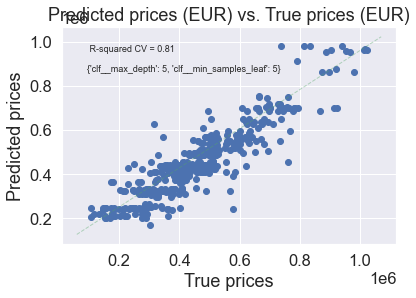

In [23]:
# Pipeline and Parameters - Decision Tree Regression

pipe_tree = Pipeline([('clf', DecisionTreeRegressor())])

param_tree = {'clf__max_depth': [2, 5, 10],
             'clf__min_samples_leaf': [5,10,50,100]}
model(pipe_tree, param_tree, X_train, y_train,features,prices)

### Random Forest

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   0.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   0.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   0.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=   0.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=   0.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=   0.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=   0.2s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=   0.1s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=   0.1s
[CV] END clf__max_depth=1, clf__max_features=1, clf__n_estimators=10; total time=   0.0s
[CV] END clf__max_dept

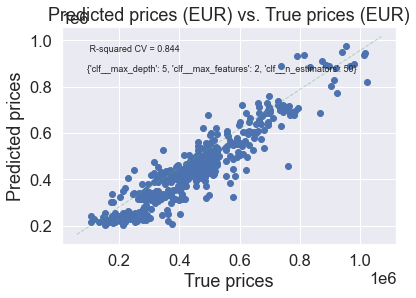

In [24]:
# Pipeline and Parameters - Random Forest

pipe_forest = Pipeline([('clf', RandomForestRegressor())])

param_forest = {'clf__n_estimators': [10, 20, 50],
                'clf__max_features': [None, 1, 2],
                'clf__max_depth': [1, 2, 5]}

model(pipe_forest, param_forest, X_train, y_train,features,prices)


### MLP Regression

In [ ]:
# Pipeline and Parameters - MLP Regression

pipe_neural = Pipeline([('scl', StandardScaler()),
                        ('clf', MLPRegressor())])

param_neural = {'clf__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'clf__hidden_layer_sizes': [(5),(10,10),(7,7,7)],
                'clf__solver': ['lbfgs'],
                'clf__activation': ['relu', 'tanh'],
                'clf__learning_rate' : ['constant', 'invscaling']}

model(pipe_neural, param_neural, X_train, y_train,features,prices)

### PREDECTION AND CALCULATION OF ACCURACY

In [49]:
def accs(mod):
    model_scaled=Pipeline([('scale',StandardScaler()),
                          ('model',mod)])
    model_scaled.fit(X_train,y_train)
    return model_scaled.score(X_test,y_test)

def non_accs(mod):
    model_scaled=Pipeline([('model',mod)])
    model_scaled.fit(X_train,y_train)
    return model_scaled.score(X_test,y_test)
    

In [80]:
lrreg=LinearRegression() ##s
ridge=Ridge(alpha=10) ##s
lgreg=Lasso(alpha=10,max_iter=1500) ##s
mlreg=MLPRegressor(activation='relu', alpha=100, hidden_layer_sizes=(10, 10), learning_rate='invscaling', solver='lbfgs')
xgbreg=xgb.XGBRegressor(colsample_bytree=1,gamma=0.01,max_depth=5,min_child_weight=6,subsample=0.7) ##w
rfreg=RandomForestRegressor(n_estimators=50,max_depth=5,max_features=2) ##w
knnreg=KNeighborsRegressor(n_neighbors=5) ##w
dref=DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
l1=[lrreg,ridge,lgreg,mlreg]
l=[xgbreg,rfreg,knnreg,dref]


In [81]:
for i in l1:
    print(i,"--->",accs(i))
for i in l:
    print(i,"--->",non_accs(i))

LinearRegression() ---> 0.6910934003098512
Ridge(alpha=10) ---> 0.6896675947052686
Lasso(alpha=10, max_iter=1500) ---> 0.6910861850941148
MLPRegressor(alpha=100, hidden_layer_sizes=(10, 10), learning_rate='invscaling',
             solver='lbfgs') ---> 0.8050954205397322
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None) ---> 0.8056412589586034
RandomForestRegressor(max_depth=5, max_features=2, n_estimators=50) ---> 0.8636613136716199
KNeighborsRegressor() ---> 0.8173

###  From above we can conclude that Random Forest Regression Algorithim works well.

In [78]:
import pickle
pickle.dump(rfreg,open("rfreg_t.pkl",'wb'))